In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [5]:
from google.colab import drive

In [6]:
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [7]:
%cd ./drive/MyDrive/rainfall

/content/drive/MyDrive/rainfall


In [9]:
#!kaggle datasets download zeeshier/weather-forecast-dataset
#!unzip weather-forecast-dataset.zip

In [10]:
path = "weather_forecast_data.csv"
dataset = pd.read_csv(path)

In [11]:
dataset.head(4)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain


# Датасет про погоду:



**Temperature**  температура воздуха

---
**Humidity**  влажность

---

**Wind_Speed**  скорость ветра

---

**Cloud_Cover**  облачное покрытие

---

**Pressure**  атмосферное давление

---

**Rain**  дождь (будет/ не будет)

---

In [12]:
vals = dataset['Rain'].unique()
vals

array(['rain', 'no rain'], dtype=object)

In [26]:
# категориальные в количественные (нет дождя - 0, дождь - 1)
y = dataset['Rain'].replace(vals, [1, 0])
X = dataset.drop('Rain', axis=1)

<ipython-input-26-437978b5a4f2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = dataset['Rain'].replace(vals, [1, 0])


In [14]:
cols_for_clusters = ["Temperature", "Humidity", "Wind_Speed", "Cloud_Cover", "Pressure"]

# Метод главных компонентов (Principal Component Analysis)



> PCA — это метод на основе проекций.


> идея PCA — уменьшить количество переменных в наборе данных, сохраняя при этом как можно больше информации.


In [15]:
from sklearn import datasets
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=2)
X_new = pca.fit(X).transform(X)

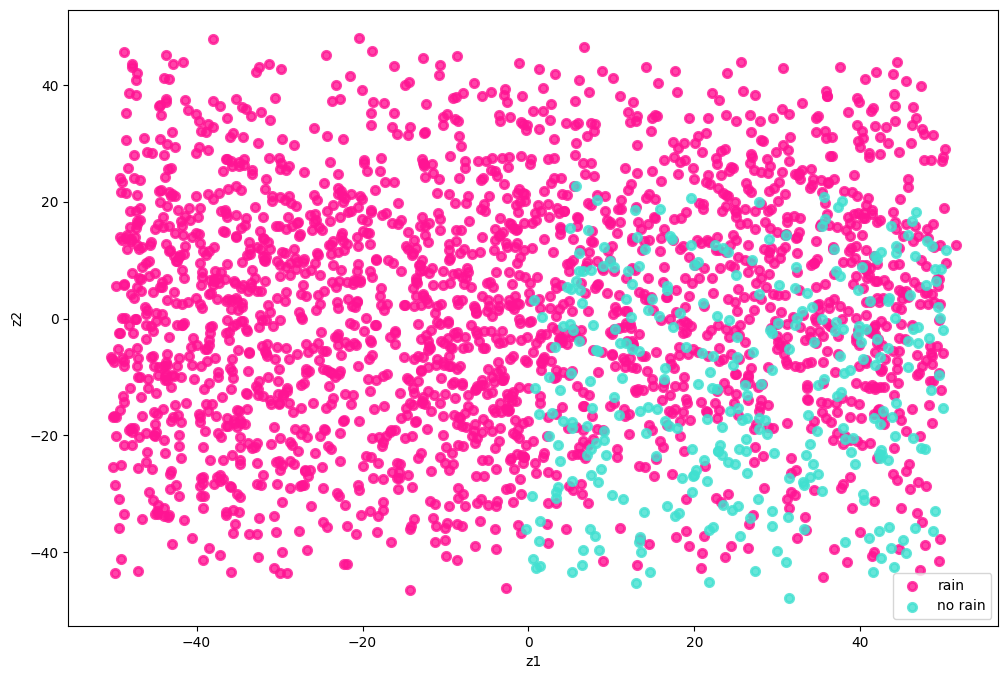

In [20]:
plt.figure(figsize=(12,8))
colors = ["deeppink", "turquoise"]
lw = 2

for color, i in zip(colors, [0, 1]):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [18]:
pca.explained_variance_ratio_

array([0.48733094, 0.23929057])

первые главные компоненты сохраняют 49% дисперсии набора данных

вторые главные компоненты сохраняют только 24% дисперсии

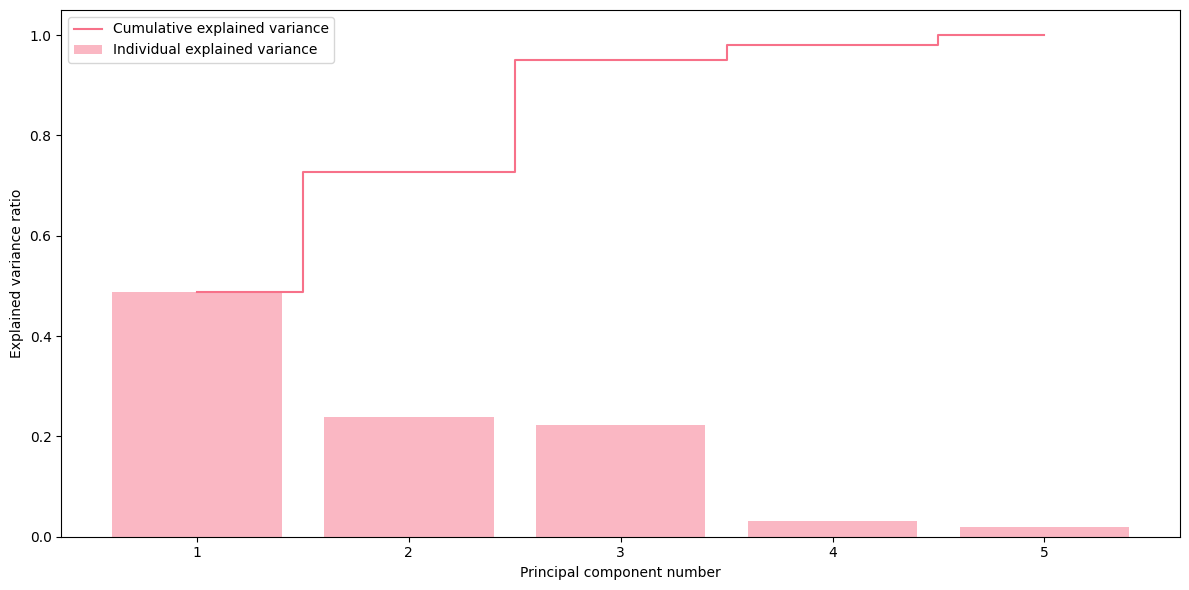

In [40]:
# # Scale the dataset; This is very important before you apply PCA #
from sklearn.preprocessing import StandardScaler

# Instantiate PCA
pca = PCA()

# Determine transformed features
X_pca = pca.fit_transform(X)

# Determine explained variance using explained_variance_ratio_ attribute
exp_var_pca = pca.explained_variance_ratio_

# visualizing the variance explained by each principal component.
cum_sum = np.cumsum(exp_var_pca)

# Create  plot
plt.bar(range(1,len(exp_var_pca)+1),
        exp_var_pca,
        alpha=0.5,
        align='center',
        label='Individual explained variance')

plt.step(range(1,len(cum_sum)+1),
         cum_sum,
         where = 'mid',
         label='Cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component number')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Независисый анализ компонентов (Independent Component Analysis)